In [1]:
import requests

In [2]:
from autoscraper import AutoScraper 

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import spacy
import string
import re
import nltk

from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from wordcloud import WordCloud,STOPWORDS
from textblob import TextBlob
from nltk.tokenize import TweetTokenizer,word_tokenize

import warnings
warnings.filterwarnings('ignore')

In [4]:
base_url ="https://www.amazon.co.uk/Soundcore-Cancelling-Wireless-Multipoint-Connection-Dusk-Purple/product-reviews/B09CG3B9SW/ref=cm_cr_getr_d_paging_btm_next_4?ie=UTF8&reviewerType=all_reviews"
wanted_list = ["Can't imagine any other buds being better."]

In [5]:
for page in range(100):
  url = base_url+"&page="
  r = requests.get(url)

In [6]:
scraper =AutoScraper()
result = scraper.build(url,wanted_list)
print(result)

["Can't imagine any other buds being better.", 'Verified Purchase', 'Step up from an already lofty position', 'The best sounding bluetooth kit I have used', 'Sound engineer:  in depth but easy to understand review', 'Not too bad I guess', 'CLOSE BUT NO CIGAR', 'Great sound but some issues.', "I nearly sold my galaxy buds pro (which I love) for these! Thank God I didn't!", "Best I've tried for sound quality!", 'Superb sound, easy to use under a full face motorcycle helmet.', 'Reviewed in the United Kingdom on 2 August 2022', "I'd started with a wonderful looking  generic pair of buds that I purchased and sadly that was the only superlative, they looked good. I returned and bought a pair of Samsung Galaxy Live buds. The sound was incredible but the fit wasn't; they just felt like lumps in my ears that I continually struggled to get them to stay in place. I gave up; very disappointed though as the sound really was excellent.So after hours and hours reading reviews I came down to two pairs

In [7]:
text_data = ' '.join(result)
text_data

"Can't imagine any other buds being better. Verified Purchase Step up from an already lofty position The best sounding bluetooth kit I have used Sound engineer:  in depth but easy to understand review Not too bad I guess CLOSE BUT NO CIGAR Great sound but some issues. I nearly sold my galaxy buds pro (which I love) for these! Thank God I didn't! Best I've tried for sound quality! Superb sound, easy to use under a full face motorcycle helmet. Reviewed in the United Kingdom on 2 August 2022 I'd started with a wonderful looking  generic pair of buds that I purchased and sadly that was the only superlative, they looked good. I returned and bought a pair of Samsung Galaxy Live buds. The sound was incredible but the fit wasn't; they just felt like lumps in my ears that I continually struggled to get them to stay in place. I gave up; very disappointed though as the sound really was excellent.So after hours and hours reading reviews I came down to two pairs. One I bought ,the other I didn’t. I

In [8]:
tknzr = TweetTokenizer(strip_handles=True)
data_tokens = tknzr.tokenize(text_data)
print(data_tokens)

["Can't", 'imagine', 'any', 'other', 'buds', 'being', 'better', '.', 'Verified', 'Purchase', 'Step', 'up', 'from', 'an', 'already', 'lofty', 'position', 'The', 'best', 'sounding', 'bluetooth', 'kit', 'I', 'have', 'used', 'Sound', 'engineer', ':', 'in', 'depth', 'but', 'easy', 'to', 'understand', 'review', 'Not', 'too', 'bad', 'I', 'guess', 'CLOSE', 'BUT', 'NO', 'CIGAR', 'Great', 'sound', 'but', 'some', 'issues', '.', 'I', 'nearly', 'sold', 'my', 'galaxy', 'buds', 'pro', '(', 'which', 'I', 'love', ')', 'for', 'these', '!', 'Thank', 'God', 'I', "didn't", '!', 'Best', "I've", 'tried', 'for', 'sound', 'quality', '!', 'Superb', 'sound', ',', 'easy', 'to', 'use', 'under', 'a', 'full', 'face', 'motorcycle', 'helmet', '.', 'Reviewed', 'in', 'the', 'United', 'Kingdom', 'on', '2', 'August', '2022', "I'd", 'started', 'with', 'a', 'wonderful', 'looking', 'generic', 'pair', 'of', 'buds', 'that', 'I', 'purchased', 'and', 'sadly', 'that', 'was', 'the', 'only', 'superlative', ',', 'they', 'looked', 'g

In [9]:
token_text = ' '.join(data_tokens)
token_text

"Can't imagine any other buds being better . Verified Purchase Step up from an already lofty position The best sounding bluetooth kit I have used Sound engineer : in depth but easy to understand review Not too bad I guess CLOSE BUT NO CIGAR Great sound but some issues . I nearly sold my galaxy buds pro ( which I love ) for these ! Thank God I didn't ! Best I've tried for sound quality ! Superb sound , easy to use under a full face motorcycle helmet . Reviewed in the United Kingdom on 2 August 2022 I'd started with a wonderful looking generic pair of buds that I purchased and sadly that was the only superlative , they looked good . I returned and bought a pair of Samsung Galaxy Live buds . The sound was incredible but the fit wasn't ; they just felt like lumps in my ears that I continually struggled to get them to stay in place . I gave up ; very disappointed though as the sound really was excellent.So after hours and hours reading reviews I came down to two pairs . One I bought , the o

In [10]:
no_punc_text = token_text.translate(str.maketrans('','',string.punctuation))
no_punc_text

'Cant imagine any other buds being better  Verified Purchase Step up from an already lofty position The best sounding bluetooth kit I have used Sound engineer  in depth but easy to understand review Not too bad I guess CLOSE BUT NO CIGAR Great sound but some issues  I nearly sold my galaxy buds pro  which I love  for these  Thank God I didnt  Best Ive tried for sound quality  Superb sound  easy to use under a full face motorcycle helmet  Reviewed in the United Kingdom on 2 August 2022 Id started with a wonderful looking generic pair of buds that I purchased and sadly that was the only superlative  they looked good  I returned and bought a pair of Samsung Galaxy Live buds  The sound was incredible but the fit wasnt  they just felt like lumps in my ears that I continually struggled to get them to stay in place  I gave up  very disappointed though as the sound really was excellentSo after hours and hours reading reviews I came down to two pairs  One I bought  the other I didn ’ t  I took 

In [11]:
text_tokens = word_tokenize(no_punc_text)
print(text_tokens)

['Cant', 'imagine', 'any', 'other', 'buds', 'being', 'better', 'Verified', 'Purchase', 'Step', 'up', 'from', 'an', 'already', 'lofty', 'position', 'The', 'best', 'sounding', 'bluetooth', 'kit', 'I', 'have', 'used', 'Sound', 'engineer', 'in', 'depth', 'but', 'easy', 'to', 'understand', 'review', 'Not', 'too', 'bad', 'I', 'guess', 'CLOSE', 'BUT', 'NO', 'CIGAR', 'Great', 'sound', 'but', 'some', 'issues', 'I', 'nearly', 'sold', 'my', 'galaxy', 'buds', 'pro', 'which', 'I', 'love', 'for', 'these', 'Thank', 'God', 'I', 'didnt', 'Best', 'Ive', 'tried', 'for', 'sound', 'quality', 'Superb', 'sound', 'easy', 'to', 'use', 'under', 'a', 'full', 'face', 'motorcycle', 'helmet', 'Reviewed', 'in', 'the', 'United', 'Kingdom', 'on', '2', 'August', '2022', 'Id', 'started', 'with', 'a', 'wonderful', 'looking', 'generic', 'pair', 'of', 'buds', 'that', 'I', 'purchased', 'and', 'sadly', 'that', 'was', 'the', 'only', 'superlative', 'they', 'looked', 'good', 'I', 'returned', 'and', 'bought', 'a', 'pair', 'of', 

In [12]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [13]:
len(text_tokens)

1471

In [14]:
stopwords = stopwords.words('english')
no_stop_tokens = [word for word in text_tokens if not word in stopwords]
print(no_stop_tokens)

['Cant', 'imagine', 'buds', 'better', 'Verified', 'Purchase', 'Step', 'already', 'lofty', 'position', 'The', 'best', 'sounding', 'bluetooth', 'kit', 'I', 'used', 'Sound', 'engineer', 'depth', 'easy', 'understand', 'review', 'Not', 'bad', 'I', 'guess', 'CLOSE', 'BUT', 'NO', 'CIGAR', 'Great', 'sound', 'issues', 'I', 'nearly', 'sold', 'galaxy', 'buds', 'pro', 'I', 'love', 'Thank', 'God', 'I', 'didnt', 'Best', 'Ive', 'tried', 'sound', 'quality', 'Superb', 'sound', 'easy', 'use', 'full', 'face', 'motorcycle', 'helmet', 'Reviewed', 'United', 'Kingdom', '2', 'August', '2022', 'Id', 'started', 'wonderful', 'looking', 'generic', 'pair', 'buds', 'I', 'purchased', 'sadly', 'superlative', 'looked', 'good', 'I', 'returned', 'bought', 'pair', 'Samsung', 'Galaxy', 'Live', 'buds', 'The', 'sound', 'incredible', 'fit', 'wasnt', 'felt', 'like', 'lumps', 'ears', 'I', 'continually', 'struggled', 'get', 'stay', 'place', 'I', 'gave', 'disappointed', 'though', 'sound', 'really', 'excellentSo', 'hours', 'hours

In [15]:
lower_words = [Text.lower() for Text in no_stop_tokens]
print(lower_words)

['cant', 'imagine', 'buds', 'better', 'verified', 'purchase', 'step', 'already', 'lofty', 'position', 'the', 'best', 'sounding', 'bluetooth', 'kit', 'i', 'used', 'sound', 'engineer', 'depth', 'easy', 'understand', 'review', 'not', 'bad', 'i', 'guess', 'close', 'but', 'no', 'cigar', 'great', 'sound', 'issues', 'i', 'nearly', 'sold', 'galaxy', 'buds', 'pro', 'i', 'love', 'thank', 'god', 'i', 'didnt', 'best', 'ive', 'tried', 'sound', 'quality', 'superb', 'sound', 'easy', 'use', 'full', 'face', 'motorcycle', 'helmet', 'reviewed', 'united', 'kingdom', '2', 'august', '2022', 'id', 'started', 'wonderful', 'looking', 'generic', 'pair', 'buds', 'i', 'purchased', 'sadly', 'superlative', 'looked', 'good', 'i', 'returned', 'bought', 'pair', 'samsung', 'galaxy', 'live', 'buds', 'the', 'sound', 'incredible', 'fit', 'wasnt', 'felt', 'like', 'lumps', 'ears', 'i', 'continually', 'struggled', 'get', 'stay', 'place', 'i', 'gave', 'disappointed', 'though', 'sound', 'really', 'excellentso', 'hours', 'hours

In [16]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()
stemmed_tokens = [ps.stem(word) for word in lower_words]
print(stemmed_tokens[100:200])

['place', 'i', 'gave', 'disappoint', 'though', 'sound', 'realli', 'excellentso', 'hour', 'hour', 'read', 'review', 'i', 'came', 'two', 'pair', 'one', 'i', 'bought', 'i', '’', 'i', 'took', 'plung', 'bought', 'soundcor', 'anker', 'liberti', '3', 'pro', 'activ', 'nois', 'cancel', 'earbud', 'waitedth', 'box', 'impress', 'describ', 'full', 'rang', 'ear', 'tip', 'wing', 'i', 'felt', 'certain', 'would', 'combin', 'would', 'fit', 'i', 'download', 'soundcor', 'app', 'i', 'mention', 'realli', 'comprehens', 'first', 'full', 'charg', 'bud', 'situ', 'set', 'point', 'samsung', 's20fe', 'simplic', 'next', 'get', 'ear', 'insert', 'slightli', 'turn', 'wing', 'lock', 'place', 'job', 'done', 'next', 'look', 'plethora', 'set', 'avail', 'listen', 'music', 'i', 'hit', 'play', 'barn', 'courtney', '‘', 'glitter', 'gold', '’', 'follow', 'the', 'dead', 'south', '‘']


In [17]:
nlp = spacy.load('en_core_web_sm')
doc = nlp(' '.join(lower_words))
print(doc)

cant imagine buds better verified purchase step already lofty position the best sounding bluetooth kit i used sound engineer depth easy understand review not bad i guess close but no cigar great sound issues i nearly sold galaxy buds pro i love thank god i didnt best ive tried sound quality superb sound easy use full face motorcycle helmet reviewed united kingdom 2 august 2022 id started wonderful looking generic pair buds i purchased sadly superlative looked good i returned bought pair samsung galaxy live buds the sound incredible fit wasnt felt like lumps ears i continually struggled get stay place i gave disappointed though sound really excellentso hours hours reading reviews i came two pairs one i bought i ’ i took plunge bought soundcore anker liberty 3 pro active noise cancelling earbuds waitedthe box impressive described full range ear tips wings i felt certain would combination would fit i downloaded soundcore app i mention really comprehensive first full charge buds situ set p

In [18]:
lemmas =[token.lemma_ for token in doc]
print(lemmas)

['can', 'not', 'imagine', 'bud', 'well', 'verify', 'purchase', 'step', 'already', 'lofty', 'position', 'the', 'good', 'sound', 'bluetooth', 'kit', 'I', 'use', 'sound', 'engineer', 'depth', 'easy', 'understand', 'review', 'not', 'bad', 'I', 'guess', 'close', 'but', 'no', 'cigar', 'great', 'sound', 'issue', 'I', 'nearly', 'sell', 'galaxy', 'bud', 'pro', 'I', 'love', 'thank', 'god', 'I', 'do', 'not', 'good', 'I', 've', 'try', 'sound', 'quality', 'superb', 'sound', 'easy', 'use', 'full', 'face', 'motorcycle', 'helmet', 'review', 'united', 'kingdom', '2', 'august', '2022', 'i', 'd', 'start', 'wonderful', 'look', 'generic', 'pair', 'bud', 'I', 'purchase', 'sadly', 'superlative', 'look', 'good', 'I', 'return', 'buy', 'pair', 'samsung', 'galaxy', 'live', 'bud', 'the', 'sound', 'incredible', 'fit', 'be', 'not', 'feel', 'like', 'lump', 'ear', 'I', 'continually', 'struggle', 'get', 'stay', 'place', 'I', 'gave', 'disappoint', 'though', 'sound', 'really', 'excellentso', 'hour', 'hour', 'read', 'rev

In [19]:
clean_reviews = ' '.join(lemmas)
clean_reviews

"can not imagine bud well verify purchase step already lofty position the good sound bluetooth kit I use sound engineer depth easy understand review not bad I guess close but no cigar great sound issue I nearly sell galaxy bud pro I love thank god I do not good I ve try sound quality superb sound easy use full face motorcycle helmet review united kingdom 2 august 2022 i d start wonderful look generic pair bud I purchase sadly superlative look good I return buy pair samsung galaxy live bud the sound incredible fit be not feel like lump ear I continually struggle get stay place I gave disappoint though sound really excellentso hour hour read review I come two pair one I buy I ' I take plunge buy soundcore anker liberty 3 pro active noise cancel earbud waitedthe box impressive describe full range ear tip wing I feel certain would combination would fit I download soundcore app I mention really comprehensive first full charge bud situ set point samsung s20fe simplicity next get ear insert s

In [20]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
tweetscv = cv.fit_transform(lemmas)
print(cv.vocabulary_)                           

{'can': 56, 'not': 254, 'imagine': 192, 'bud': 52, 'well': 418, 'verify': 409, 'purchase': 288, 'step': 349, 'already': 21, 'lofty': 220, 'position': 277, 'the': 370, 'good': 169, 'sound': 339, 'bluetooth': 50, 'kit': 207, 'use': 403, 'engineer': 126, 'depth': 96, 'easy': 118, 'understand': 398, 'review': 306, 'bad': 43, 'guess': 171, 'close': 69, 'but': 54, 'no': 251, 'cigar': 66, 'great': 170, 'issue': 203, 'nearly': 246, 'sell': 317, 'galaxy': 158, 'pro': 283, 'love': 223, 'thank': 369, 'god': 167, 'do': 107, 've': 408, 'try': 392, 'quality': 289, 'superb': 358, 'full': 155, 'face': 137, 'motorcycle': 242, 'helmet': 183, 'united': 399, 'kingdom': 206, 'august': 39, '2022': 4, 'start': 347, 'wonderful': 424, 'look': 222, 'generic': 161, 'pair': 259, 'sadly': 310, 'superlative': 359, 'return': 305, 'buy': 55, 'samsung': 311, 'live': 218, 'incredible': 197, 'fit': 148, 'be': 46, 'feel': 142, 'like': 215, 'lump': 228, 'ear': 114, 'continually': 84, 'struggle': 352, 'get': 163, 'stay': 3

In [21]:
print(cv.get_feature_names()[100:200])

['difficult', 'dimensionmy', 'direct', 'disappoint', 'discount', 'discreet', 'distinguish', 'do', 'dodgy', 'door', 'double', 'doubletap', 'download', 'drop', 'ear', 'earbud', 'earthe', 'easily', 'easy', 'echo', 'eight', 'either', 'element', 'emphasise', 'enchant', 'energetic', 'engineer', 'enhance', 'environment', 'equalizer', 'essentially', 'even', 'every', 'exactly', 'example', 'excellentso', 'experience', 'face', 'fact', 'fall', 'fantastic', 'feature', 'feel', 'fiddle', 'fiddly', 'find', 'firmware', 'first', 'fit', 'five', 'fix', 'fly', 'follow', 'for', 'forward', 'full', 'fully', 'function', 'galaxy', 'gave', 'generally', 'generic', 'gesture', 'get', 'give', 'glitter', 'go', 'god', 'gold', 'good', 'great', 'guess', 'gym', 'habit', 'half', 'hand', 'handle', 'hardware', 'have', 'hear', 'heardnoise', 'heart', 'hell', 'helmet', 'hiss', 'hit', 'hold', 'home', 'hope', 'hour', 'however', 'ill', 'imagine', 'impressive', 'in', 'inapp', 'inbetween', 'incredible', 'incrediblethe', 'insert']


In [22]:
print(tweetscv.toarray()[100:200])


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [23]:
print(tweetscv.toarray().shape)

(884, 430)


In [24]:
ngram_range = CountVectorizer(analyzer='word',ngram_range=(1,3),max_features=100)
bow_matrix_ngram = ngram_range.fit_transform(lemmas)

In [25]:
print(ngram_range.get_feature_names())
print(bow_matrix_ngram.toarray())

['3s', 'also', 'although', 'app', 'around', 'bud', 'buy', 'charge', 'control', 'device', 'do', 'double', 'ear', 'earbud', 'easily', 'easy', 'either', 'element', 'environment', 'even', 'every', 'experience', 'feature', 'feel', 'fit', 'full', 'galaxy', 'get', 'give', 'go', 'good', 'great', 'half', 'hand', 'hear', 'hour', 'however', 'imagine', 'in', 'iphone', 'issue', 'kingdom', 'last', 'leave', 'liberty', 'like', 'listen', 'long', 'look', 'make', 'misread', 'mode', 'music', 'new', 'next', 'noise', 'noisy', 'not', 'notice', 'old', 'one', 'pair', 'pause', 'percent', 'phone', 'place', 'play', 'point', 'pro', 'product', 'purchase', 'quality', 'quick', 'quiet', 'range', 'really', 'return', 'review', 'right', 'room', 'samsung', 'say', 'setting', 'single', 'slightly', 'small', 'sound', 'soundcore', 'stay', 'still', 'tap', 'the', 'time', 'try', 'two', 'use', 'well', 'wing', 'work', 'wow']
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 

In [26]:
# TF-IDF Vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
tfidfv_ngram_max_features = TfidfVectorizer(analyzer= 'word',ngram_range= (1,3),max_features=100)
tfidf_matrix_ngrams = tfidfv_ngram_max_features.fit_transform(lemmas)

In [27]:
print(tfidfv_ngram_max_features.get_feature_names())
print(tfidf_matrix_ngrams.toarray())

['3s', 'also', 'although', 'app', 'around', 'bud', 'buy', 'charge', 'control', 'device', 'do', 'double', 'ear', 'earbud', 'easily', 'easy', 'either', 'element', 'environment', 'even', 'every', 'experience', 'feature', 'feel', 'fit', 'full', 'galaxy', 'get', 'give', 'go', 'good', 'great', 'half', 'hand', 'hear', 'hour', 'however', 'imagine', 'in', 'iphone', 'issue', 'kingdom', 'last', 'leave', 'liberty', 'like', 'listen', 'long', 'look', 'make', 'misread', 'mode', 'music', 'new', 'next', 'noise', 'noisy', 'not', 'notice', 'old', 'one', 'pair', 'pause', 'percent', 'phone', 'place', 'play', 'point', 'pro', 'product', 'purchase', 'quality', 'quick', 'quiet', 'range', 'really', 'return', 'review', 'right', 'room', 'samsung', 'say', 'setting', 'single', 'slightly', 'small', 'sound', 'soundcore', 'stay', 'still', 'tap', 'the', 'time', 'try', 'two', 'use', 'well', 'wing', 'work', 'wow']
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0

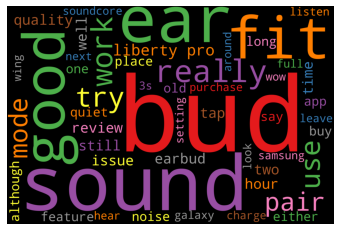

In [28]:
def plot_cloud(wordcloud):
    plt.imshow(wordcloud)
    plt.axis('off')

STOPWORDS.add('pron')
STOPWORDS.add('rt')
STOPWORDS.add('yeah')
wordcloud=WordCloud(width =3000,height=2000,background_color = 'black',max_words=50,colormap='Set1',stopwords=STOPWORDS).generate(clean_reviews)
plot_cloud(wordcloud)
    

In [29]:
Review_words = clean_reviews.split(' ')

In [30]:
#Positive words 
with open('negative-words.txt','r')as pos:
  poswords = pos.read().split('\n')
poswords = poswords[36:]

#Negative words

with open('positive-words.txt','r') as neg:
  negwords = neg.read().split('\n')
negwords = negwords[37:]

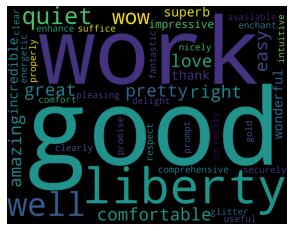

In [31]:
ip_neg_in_neg = " ".join ([w for w in Review_words if w in negwords])

wordcloud_neg_in_neg = WordCloud(
                      background_color='black',
                      width=1800,
                      height=1400
                     ).generate(ip_neg_in_neg)

plt.imshow(wordcloud_neg_in_neg)
plt.axis("off")

plt.show()

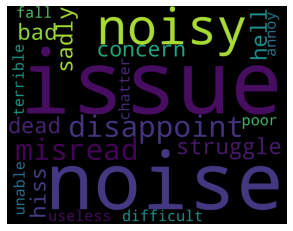

In [32]:
ip_pos_in_pos = " ".join ([w for w in Review_words if w in poswords])
wordcloud_pos_in_pos = WordCloud(
                      background_color='black',
                      width=1800,
                      height=1400
                     ).generate(ip_pos_in_pos)
plt.imshow(wordcloud_pos_in_pos)
plt.axis("off")
plt.show()

In [33]:
len(ip_pos_in_pos)

209

In [34]:
len(ip_neg_in_neg)

564

In [35]:
209/773

0.2703751617076326

In [36]:
564/773

0.7296248382923674

### Named entity recognition

In [37]:
nlp = spacy.load('en_core_web_sm')

one_block = clean_reviews
doc_block = nlp(one_block)
spacy.displacy.render(doc_block,style = 'ent',jupyter = True)

In [38]:
for token in doc_block[100:200]:
    print(token,token.pos_)

I PRON
continually ADV
struggle VERB
get VERB
stay VERB
place NOUN
I PRON
gave VERB
disappoint NOUN
though ADV
sound VERB
really ADV
excellentso NOUN
hour NOUN
hour NOUN
read VERB
review NOUN
I PRON
come VERB
two NUM
pair NOUN
one NUM
I PRON
buy VERB
I PRON
' PUNCT
I PRON
take VERB
plunge NOUN
buy VERB
soundcore NOUN
anker NOUN
liberty PROPN
3 NUM
pro ADJ
active ADJ
noise NOUN
cancel VERB
earbud PROPN
waitedthe PROPN
box PROPN
impressive ADJ
describe VERB
full ADJ
range NOUN
ear NOUN
tip NOUN
wing NOUN
I PRON
feel VERB
certain ADJ
would AUX
combination NOUN
would AUX
fit VERB
I PRON
download VERB
soundcore NOUN
app NOUN
I PRON
mention VERB
really ADV
comprehensive ADJ
first ADJ
full ADJ
charge NOUN
bud NOUN
situ NOUN
set NOUN
point NOUN
samsung PROPN
s20fe NOUN
simplicity NOUN
next ADV
get VERB
ear NOUN
insert ADJ
slightly ADV
turn VERB
wing NOUN
lock NOUN
place NOUN
job NOUN
do AUX
next ADV
look NOUN
plethora ADV
setting VERB
available ADJ
listen NOUN
music NOUN
I PRON
hit VERB
play N

In [39]:
# Filtering the nouns and verbs only
nouns_verbs = [token.text for token in doc_block if token.pos_ in ('NOUN','VERB')]
print(nouns_verbs[100:200])

['courtney', 'glitter', 'gold', 'follow', 'south', 'company', 'fiddle', 'setting', 'get', 'thing', "'", 'pensioner', 'time', 'teeter', 'hardware', 'mission', 'speaker', 'day', 'want', 'hear', 'music', 'balance', 'pleasing', 'tone', 'disappoint', 'result', 'side', 'think', 'galaxy', 'live', 'quality', 'hour', 'hand', 'heart', 'say', 'ear', 'pair', 'backbeat', 'year', 'soundcore', 'concern', 'comparison', 'ear', 'ear', 'quality', "'", 'leave', 'move', 'say', 'sound', 'fit', 'give', 'star', 'use', 'test', 'update', 'review', 'time', 'seal', 'allow', 'tone', 'heardnoise', 'cancel', 'ability', 'say', 'go', 'try', 'element', 'home', 'hear', 'hiss', 'track', 'part', 'test', 'go', 'environment', 'turn', 'tv', 'hear', 'part', 'give', 'trackbatterie', 'app', 'show', 'charge', 'know', 'leave', 'afternoon', 'go', 'imagine', 'gym', 'sessionall', 'return', 'summary', 'sound', 'bit', 'feature', 'work', 'welltldr', 'version']


In [40]:
# Counting the noun & verb tokens
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()

X = cv.fit_transform(nouns_verbs)
sum_words = X.sum(axis=0)

words_freq = [(word,sum_words[0,idx]) for word,idx in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1],reverse=True)

wd_df = pd.DataFrame(words_freq)
wd_df.columns=['word','count']
wd_df[0:10] # viewing top ten results

,word,count
0,bud,16
1,sound,14
2,ear,14
3,work,8
4,use,7
5,try,6
6,mode,6
7,issue,5
8,quality,5
9,pair,5
